In [40]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [93]:
knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000)}
weight_limit = 400
array_weight = 0
# isinstance(knapsack[0], tuple)
# len(knapsack)

In [141]:
knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000), 5: (700, 400), 6: (50, 4500), 7: (100,1500), 8: (10,3500)}
weight_limit = 5000
array_weight = 0
# # isinstance(knapsack[0], tuple)
# # len(knapsack)

In [142]:
array = np.random.randint(2, size=5)
array
dictanorysize=9

# Functions

### Check if random array is smaller than weight = feasability

In [143]:
def check_feasibility(array, knapsack):
    array_weight = 0
    for i in range(len(knapsack)):
        knapsack_weight = knapsack[i]
        dummy = array[i]*knapsack_weight[0]
        array_weight = array_weight + dummy
    
    feasible = (weight_limit >= array_weight) and array_weight > 0
    return feasible

### Hill-climbing swap function

In [144]:
def swap(array):  
    best_array = array   
    for i in range(len(best_array)):
        dummy_array = np.copy(best_array)
        dummy_var = dummy_array[i]
        if(i < (len(best_array)-1)): 
            dummy_array[i] = dummy_array[i+1]
            dummy_array[i+1] = dummy_var
        else:
            dummy_array[i] = dummy_array[i-len(best_array)]
            dummy_array[i-len(best_array)] = dummy_var
        
        
        if check_feasibility(dummy_array, knapsack) == True:
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
#     print("d")
    return best_array

### First-choice-hill-climbing swap function

In [145]:
def fcSwap(array):
    best_array = array   
    for i in range(len(best_array)):
        dummy_array = np.copy(best_array)
        dummy_var = dummy_array[i]
        if(i < (len(best_array)-1)): 
            dummy_array[i] = dummy_array[i+1]
            dummy_array[i+1] = dummy_var
        else:
            dummy_array[i] = dummy_array[i-len(best_array)]
            dummy_array[i-len(best_array)] = dummy_var
        
        
        if check_feasibility(dummy_array, knapsack) == True:
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
                break
#     print("a")
    return best_array

### Hill-climbing transposition function

In [146]:
def transp(array):  
    best_array = array   
    for i in range(len(best_array)):
       

            for j in range(len(best_array)):
#           for j in range(i+1, len(best_array)):              
                dummy_array = np.copy(best_array)
                dummy_var = dummy_array[i]
                dummy_array[i] = dummy_array[j]
                dummy_array[j] = dummy_var

                if check_feasibility(dummy_array, knapsack) == True:
                    if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                        best_array = dummy_array
#     print("b")
    return best_array

### First-choice-hill-climbing transposition function

In [147]:
def fcTransp(array):  
    best_array = array   
    for i in range(len(best_array)):
       
            for j in range(len(best_array)):
#           for j in range(i+1, len(best_array)):
                
                dummy_array = np.copy(best_array)
                dummy_var = dummy_array[i]
                dummy_array[i] = dummy_array[j]
                dummy_array[j] = dummy_var

                if check_feasibility(dummy_array, knapsack) == True:
                    if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                        best_array = dummy_array
                        break
#     print("c")            
    return best_array

### Get Knapsack Value

In [148]:
def getValuefromArray(array, knapsack): 
    array_value = 0
    for i in range(len(knapsack)):
        knapsack_value = knapsack[i]
        dummy = array[i]*knapsack_value[1]
        array_value = array_value + dummy
    
    return array_value

In [149]:
# checking if function works
knapsack = {0: (1, 5000), 1: (10, 1000), 2: (100, 2000), 3: (200, 5000), 4: (300, 4000)}
test = knapsack[0]
test[1]
array = np.random.randint(2, size=5)
print(array)
print(array[0])
getValuefromArray(array, knapsack)

[0 0 1 1 0]
0


7000

### Get Knapsack Weight

In [150]:
def getWeightfromArray(array, knapsack):
    array_weight = 0
    for i in range(len(knapsack)):
        knapsack_weight = knapsack[i]
        dummy = array[i]*knapsack_weight[0]
        array_weight = array_weight + dummy
    return array_weight

# Action

In [151]:
feasible = False
converged = False
count = 0
start = datetime.now()
totalCount = 0
totalValue = 0
totalWeight = 0
totalTime = 0
while(not feasible):
    array = np.random.randint(2, size=dictanorysize)
    feasible = check_feasibility(array, knapsack)
print(array)
trarray=array
fctrarray=array
while(not converged):   
    count += 1
    best_array = transp(trarray)
    converged = getValuefromArray(best_array, knapsack) <= getValuefromArray(trarray, knapsack)
    trarray = best_array

while(not converged):   
    count += 1
    best_array = fcTransp(fctrarray)
    converged = getValuefromArray(best_array, knapsack) <= getValuefromArray(fctrarray, knapsack)
    fctrarray = best_array

    
    
totalCount += count
totalValue += getValuefromArray(array, knapsack)
totalWeight = getWeightfromArray(array, knapsack)
#totalTime += datetime.now() - start
print(array)
print("trarray")
print(trarray)
print(getValuefromArray(trarray, knapsack))
print(getWeightfromArray(trarray, knapsack))
print("fctrarray")
print(fctrarray)
print(getValuefromArray(fctrarray, knapsack))
print(getWeightfromArray(fctrarray, knapsack))

print(count)
print(datetime.now() - start)

[1 0 0 0 1 1 0 0 1]
[1 0 0 0 1 1 0 0 1]
trarray
[1 0 1 1 1 0 0 0 0]
16000
601
fctrarray
[1 0 0 0 1 1 0 0 1]
9000
301
2
0:00:00.003002


# Action Loop 100

In [152]:
totalCount = 0
totalValue = 0
totalWeight = 0
#totalTime = 0
wt_array = []
time_array = []

for x in range(99):
    feasible = False
    converged = False
    count = 0
    start = datetime.now()
    while(not feasible):
        array = np.random.randint(2, size=dictanorysize)
        feasible = check_feasibility(array, knapsack)
    #print(array)
    while(not converged):   
        count += 1
        best_array = swap(array)
        converged = getValuefromArray(best_array, knapsack) <= getValuefromArray(array, knapsack)
        array = best_array

    totalCount += count
    totalValue += getValuefromArray(array, knapsack)
    totalWeight += getWeightfromArray(array, knapsack)
    totalTime = datetime.now() - start
    
    wt_array.append(getValuefromArray(array, knapsack)) 
    #totalTime = datetime.now() - start
    time_array.append(totalTime)
    #time_array.append(datetime.now() - start)
    
    #print(array)
    #print(getValuefromArray(array, knapsack))
    #print(getWeightfromArray(array, knapsack))
    #print(count)
    #print(datetime.now() - start)

print('100 Runs:')
print('Total Count:',totalCount)
print('Average Count:',totalCount / 100)
print('Total Value:',totalValue)
print('Average Value:',totalValue / 100)
print('Total Weight:',totalWeight)
print('Average Weight:',totalWeight / 100)
print('Total Time:',totalTime)
print('Average Time:',totalTime / 100)

print('Weight Array:', wt_array)
#print('Time Array:', time_array)

100 Runs:
Total Count: 189
Average Count: 1.89
Total Value: 1197000
Average Value: 11970.0
Total Weight: 42254
Average Weight: 422.54
Total Time: 0:00:00.001001
Average Time: 0:00:00.000010
Weight Array: [14000, 14000, 14000, 10000, 14000, 14000, 5000, 5000, 5000, 9000, 5000, 14000, 9000, 16000, 14000, 14000, 16000, 17000, 14000, 17000, 16000, 10000, 17000, 14000, 10000, 12000, 14000, 16000, 17000, 16000, 9000, 7000, 14000, 12000, 9000, 10000, 16000, 14000, 10000, 10000, 14000, 9000, 14000, 14000, 11000, 7000, 12000, 12000, 10000, 14000, 14000, 10000, 12000, 7000, 16000, 12000, 9000, 9000, 10000, 12000, 10000, 7000, 14000, 12000, 10000, 12000, 10000, 17000, 10000, 10000, 16000, 14000, 16000, 11000, 10000, 14000, 11000, 10000, 17000, 14000, 11000, 16000, 9000, 12000, 12000, 12000, 16000, 9000, 7000, 14000, 10000, 14000, 14000, 17000, 9000, 17000, 14000, 9000, 9000]


# Boxplots

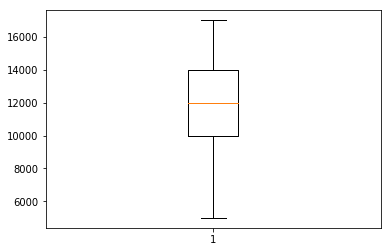

In [153]:
plt.boxplot (wt_array)
plt.show()

In [154]:
spread = np.random.randint(3, size=100)
center = 2
flier_high = np.random.randint(3, size=100)
flier_low = np.random.randint(3, size=100)
data = np.concatenate((spread, center, flier_high, flier_low), 0)

plt.boxplot(data)
plt.show()

ValueError: all the input arrays must have same number of dimensions

# Test

In [ ]:
def swaptest(array):  
    best_array = array   
    for i in range(len(best_array)-1):
        
        dummy_array = np.copy(best_array)
        dummy_var = dummy_array[i]
        print(dummy_var)
        dummy_array[i] = dummy_array[i+1]
        print(dummy_array[i])
        dummy_array[i+1] = dummy_var
        print(dummy_array[i+1])
        #print("dummy array before feasibility")
        #print(dummy_array)
        if check_feasibility(dummy_array, knapsack):
            print("dummy")
            print(dummy_array)
            print("dummy array after feasibility check")
            print(getValuefromArray(dummy_array,knapsack))
            print("best array after feasibility check")
            print(getValuefromArray(best_array,knapsack))
            print("best")
            print(best_array)
            if getValuefromArray(dummy_array, knapsack) > getValuefromArray(best_array, knapsack):
                best_array = dummy_array
                print("test")
                
    return best_array

In [ ]:
arraytest1 = np.random.randint(2, size=5)
arraytest2 = arraytest1
arraytest3 = np.copy(arraytest1)
arraytest1[0] = 2
print(arraytest1)
print(arraytest2)
print(arraytest3)

###Combining the boxplots

In [155]:
totalCount = 0
totalValue = 0
totalWeight = 0
#totalTime = 0
wt_array = []
wt_array_swap = []
wt_array_fcswap = []
wt_array_transp = []
wt_array_fctransp = []
time_array = []
count = 0
totalcount1 = 0
count2 = 0
totalcount2 = 0
count3 = 0
totalcount3 = 0
count4 = 0
totalcount4 = 0
    
for x in range(99):
    feasible = False
    converged = False
    converged_fcswap = False
    converged_transp = False
    converged_fctransp = False
    
    
    start = datetime.now()
    
    #print('Weight Array_swap:', wt_array_swap)
    while(not feasible):
        array = np.random.randint(2, size=dictanorysize)
        array_swap = array
        array_fcswap = array
        array_transp = array
        array_fctransp = array
        feasible = check_feasibility(array, knapsack)
    #print(array)
    while(not converged):   
        count1 += 1
        best_array_swap = swap(array_swap)
        converged = getValuefromArray(best_array_swap, knapsack) <= getValuefromArray(array_swap, knapsack)
        array_swap = best_array_swap
    wt_array_swap.append(getValuefromArray(array_swap, knapsack))
        
    while(not converged_fcswap):
        count1 += 2
        best_array_fcswap = fcSwap(array_fcswap)
        converged_fcswap = getValuefromArray(best_array_fcswap, knapsack) <= getValuefromArray(array_fcswap, knapsack)
        array_fcswap = best_array_fcswap
        #print("fgu")
        #print(getWeightfromArray(array_fcswap, knapsack))
    wt_array_fcswap.append(getValuefromArray(array_fcswap, knapsack)) 
          
    while(not converged_transp):
        count3 += 1
        best_array_transp = transp(array_transp)
        converged_transp = getValuefromArray(best_array_transp, knapsack) <= getValuefromArray(array_transp, knapsack)
        array_transp = best_array_transp

    wt_array_transp.append(getValuefromArray(array_transp, knapsack)) 
    
    while(not converged_fctransp): 
        count4 += 1
        best_array_fctransp = fcTransp(array_fctransp)
        converged_fctransp = getValuefromArray(best_array_fctransp, knapsack) <= getValuefromArray(array_fctransp, knapsack)
        array_fctransp = best_array_fctransp

    wt_array_fctransp.append(getValuefromArray(array_fctransp, knapsack))  
    
    
    totalcount1 += count1
    totalcount2 += count2
    totalcount3 += count3
    totalcount4 += count4
    totalValue += getValuefromArray(array, knapsack)
    totalWeight += getWeightfromArray(array, knapsack)
    totalTime = datetime.now() - start
    
#     wt_array_swap.append(getValuefromArray(array_swap, knapsack)) 
#     wt_array_fcswap.append(getValuefromArray(array_fcswap, knapsack)) 
#     wt_array_transp.append(getValuefromArray(array_transp, knapsack)) 
#     wt_array_fctransp.append(getValuefromArray(array_fctransp, knapsack)) 
    #totalTime = datetime.now() - start
    #time_array.append(totalTime)
    #time_array.append(datetime.now() - start)
    
    #print(array)
    #print(getValuefromArray(array, knapsack))
    #print(getWeightfromArray(array, knapsack))
    #print(count)
    #print(datetime.now() - start)

    
data_to_plot = [wt_array_swap, wt_array_fcswap, wt_array_transp, wt_array_fctransp ]


print('100 Runs:')
# print('Total Count:',totalCount)
# print('Average Count:',totalCount / 100)
# print('Total Value:',totalValue)
# print('Average Value:',totalValue / 100)
# print('Total Weight:',totalWeight)
# print('Average Weight:',totalWeight / 100)
print('Total Time:',totalTime)
print('Average Time:',totalTime / 100)

#print('Max values:',np.median(wt_array.median,wt_array_fcswap.median,wt_array_transp.median,wt_array_fctransp.median )
print('Median values:',np.median(wt_array_swap,axis=0))
print('Median values:',np.median(wt_array_fcswap,axis=0))
print('Median values:',np.median(wt_array_transp,axis=0))
print('Median values:',np.median(wt_array_fctransp,axis=0))

print("Count1", totalcount1)
#print('Weight Array:', wt_array)
print("Number of elements in Weight Array_swap:", len(wt_array_swap))
print('Weight Array_swap:', wt_array_swap)
print("Count2", totalcount2)
print("Number of elements in Weight Array_fcswap:", len(wt_array_fcswap))
print('Weight Array_fcSwap:', wt_array_fcswap)
print("Count3", totalcount3)
print("Number of elements in Weight Array_transp:", len(wt_array_transp))
print('Weight Array_transp:', wt_array_transp)
print("Count4", totalcount4)
print("Number of elements in Weight Array_fctransp:", len(wt_array_fctransp))
print('Weight Array_fcTransp:', wt_array_fctransp)
print('Time Array:', time_array)

100 Runs:
Total Time: 0:00:00.003002
Average Time: 0:00:00.000030
Median values: 14000.0
Median values: 14000.0
Median values: 17000.0
Median values: 17000.0
Count1 327674
Number of elements in Weight Array_swap: 99
Weight Array_swap: [16000, 10000, 14000, 16000, 17000, 14000, 14000, 14000, 5000, 12000, 10000, 7000, 17000, 14000, 14000, 10000, 10000, 17000, 14000, 5000, 11000, 9000, 10000, 9000, 11000, 17000, 13000, 5000, 9000, 16000, 5000, 16000, 9000, 16000, 16000, 11000, 12000, 14000, 14000, 16000, 13000, 14000, 10000, 11000, 14000, 9000, 14000, 10000, 16000, 16000, 9000, 14000, 14000, 9000, 11000, 16000, 14000, 14000, 14000, 10000, 16000, 14000, 14000, 5000, 10000, 14000, 10000, 16000, 17000, 16000, 14000, 12000, 12000, 16000, 14000, 10000, 16000, 10000, 10000, 10000, 14000, 16000, 16000, 16000, 10000, 16000, 9000, 14000, 16000, 9000, 14000, 9000, 11000, 16000, 5000, 5000, 14000, 9000, 14000]
Count2 0
Number of elements in Weight Array_fcswap: 99
Weight Array_fcSwap: [16000, 10000,

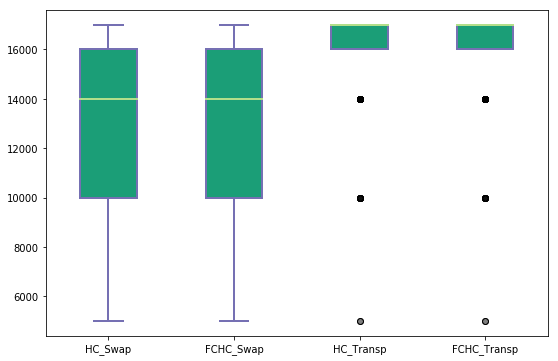

In [156]:

# def setLabelExample():
#     fig = pyplot.figure() 
#     x = [i for i in range(200)]
#     y = [xi**2 for xi in x]

#     ax = fig.add_subplot(1,1,1)
#     ax.plot(x, y) 
#     ax.tick_params(axis='x', labelsize=30)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_xticklabels(['HC_Swap', 'FCHC_Swap', 'HC_Transp', 'FCHC_Transp'])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')